# Dyadic–Neperian Geometry of Semiprimes  
## Canonical formulation and scale-invariant result

This notebook presents a **canonical synthesis** of a series of explorations conducted on the dyadic structure of prime numbers and semiprimes.

*Ce notebook présente une synthèse canonique d'une série d'explorations menées sur la structure dyadique des nombres premiers et des semiprimes.*

Earlier investigations (chalut / trawling algorithms, dyadic heatmaps, local density tests, admissible regions) revealed non-trivial regularities, but also reached apparent impasses when analyzed in linear or purely dyadic coordinates.

*Des investigations antérieures (algorithmes de chalutage, heatmaps dyadiques, tests de densité locale, régions admissibles) ont révélé des régularités non triviales, mais ont également atteint des impasses apparentes lorsqu'elles étaient analysées en coordonnées linéaires ou purement dyadiques.*

The present work establishes that these impasses were **metric, not structural**.

*Le présent travail établit que ces impasses étaient métriques, et non structurelles.*

By separating:
* the **container** (dyadic scale, given by `log₂`, defining paliers),
* from the **content** (prime density, naturally governed by `ln`),

*En séparant :*
* *Le contenant : l'échelle dyadique, donnée par $\log_2(n)$, définissant les paliers.*
* *Le contenu : la densité des premiers, naturellement gouvernée par le logarithme népérien $\ln(n)$.*

we introduce a dyadic–Neperian coordinate system in which a **universal, scale-invariant structure** of semiprime factorization becomes visible.

*nous introduisons un système de coordonnées dyadique–népérien dans lequel **une structure universelle et invariante d'échelle** de la factorisation des semiprimes devient visible.*

## Properties of the Result / Propriétés du résultat

### The result obtained here is **canonical**:
- it is independent of exploratory choices,
- invariant under scale changes,
- and directly exploitable for improved factor-search (trawling) strategies.

### Le résultat obtenu ici est canonique :
* *Indépendant des choix exploratoires.*
* *Invariant par changement d'échelle.*
* *Exploitable : directement applicable pour des stratégies de recherche de facteurs (chalutage) améliorées.*

Only the minimal definitions, experiments, and visualizations required to establish this result are retained below.

*Seules les définitions, expériences et visualisations minimales requises pour établir ce résultat sont retenues ci-dessous.*

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sympy import primerange

## Dyadic framework / Paliers et primes

We work with dyadic paliers defined by the binary logarithm:

*Nous travaillons avec des paliers dyadiques définis par le logarithme binaire :*
$
2^{k-1} \le x \le 2^k - 1
$

The dyadic scale $(log₂)$ defines the **container**: the size of the space.

Prime density inside each container, however, follows a natural logarithmic law, motivating the introduction of Neperian (ln-based) internal coordinates.

*L'échelle dyadique ($\log_2$) définit le contenant : la taille de l'espace de recherche.*

*La densité des nombres premiers à l'intérieur de chaque contenant suit cependant une loi logarithmique naturelle, motivant l'introduction de coordonnées internes népériennes (basées sur $\ln$).*

In [2]:
def dyadic_k(n: int) -> int:
    """Dyadic bit-length: k such that 2^(k-1) <= n <= 2^k - 1."""
    return n.bit_length()

def prime_band_bounds(k: int):
    lo = 1 << (k - 1)
    hi = (1 << k) - 1
    return lo, hi

def primes_in_palier(k: int):
    lo, hi = prime_band_bounds(k)
    return list(primerange(lo, hi + 1))

## Controlled generation of semiprimes / Génération contrôlée des semi-premiers

We generate semiprimes \( n = p q \) where:
* $(p)$ and $(q)$ are prime,
* both lie in the same dyadic palier $(k_p)$,
* and we **filter strictly** on products lying in the palier $(k_n = 2k_p)$.

*Nous générons des semi-premiers \( n = p q \) sous les contraintes suivantes :*
* *$(p)$ et $(q)$ sont des nombres premiers,*
* *ils appartiennent tous deux au même palier dyadique $(k_p)$,*
* *les produits sont **strictement filtrés** afin de ne conserver que ceux
  appartenant au palier $(k_n = 2k_p)$*

This removes scale-mixing effects and isolates a single geometric regime.
*Ce filtrage strict élimine les effets de mélange d’échelles et isole un régime géométrique unique et bien défini pour le produit.*


In [3]:
def sample_many_semiprimes_with_factors(k_p: int, m: int = 50000, seed: int = 1):
    rng = random.Random(seed)
    P = primes_in_palier(k_p)

    p_arr = np.empty(m, dtype=np.int64)
    q_arr = np.empty(m, dtype=np.int64)
    n_arr = np.empty(m, dtype=np.int64)

    for i in range(m):
        p = rng.choice(P)
        q = rng.choice(P)
        p_arr[i] = p
        q_arr[i] = q
        n_arr[i] = p * q

    return p_arr, q_arr, n_arr

## Canonical Neperian asymmetry / Dissymétrie népérienne canonique

We define the **central variable** of this study:

*Nous définissons la **variable centrale** de cette étude :*

$
\delta
= \log_2(p) - \frac{1}{2}\log_2(n) + \frac{1}{2}
$

This quantity measures the **relative logarithmic position of a prime factor** with respect to $(\sqrt{n}$).

*Cette quantité mesure la **position logarithmique relative d’un facteur premier** par rapport à $(\sqrt{n}$).*

It is:
* dimensionless,
* bounded,
* and directly comparable across dyadic scales.

*Elle est :*
* *sans dimension,*
* *bornée,*
* *et directement comparable entre différents paliers dyadiques.*

The existence of a stable distribution for $(\delta)$ is the core question.

*L’existence d’une distribution stable de \(\delta\) constitue la question centrale abordée ici.*


In [4]:
def compute_delta_for_k(k_p: int, m: int = 50000, seed: int = 1):
    p, q, n = sample_many_semiprimes_with_factors(k_p, m=m, seed=seed)
    k_target = 2 * k_p

    mask = np.array([dyadic_k(int(x)) == k_target for x in n], dtype=bool)
    p2 = p[mask].astype(float)
    n2 = n[mask].astype(float)

    delta = np.log2(p2) - 0.5 * np.log2(n2) + 0.5
    return delta, mask.mean()

## Scale invariance test / Test d’invariance d’échelle

We now repeat the same experiment for several dyadic paliers $(k_p)$, without changing:
* the construction,
* the filtering rule,
* or the variable definition.

*Nous répétons maintenant exactement la même expérience pour plusieurs paliers dyadiques $(k_p)$, sans modifier :*
* *la construction,*
* *la règle de filtrage,*
* *ni la définition de la variable.*

If the observed structure is intrinsic, the distributions of $(\delta)$ must coincide across scales.

*Si la structure observée est intrinsèque, les distributions de \(\delta\) doivent coïncider d’un palier à l’autre.*


In [5]:
k_list = list(range(7, 13))
rows = {}
stats = []

for k in k_list:
    delta, keep_frac = compute_delta_for_k(k)
    rows[k] = delta

    stats.append({
        "k_p": k,
        "mean": float(delta.mean()),
        "std": float(delta.std()),
        "q25": float(np.quantile(delta, 0.25)),
        "q50": float(np.quantile(delta, 0.50)),
        "q75": float(np.quantile(delta, 0.75)),
    })

df_stats = pd.DataFrame(stats)
df_stats

,k_p,mean,std,q25,q50,q75
0,7,0.499184,0.181221,0.389867,0.5,0.610133
1,8,0.497955,0.192238,0.360593,0.5,0.633993
2,9,0.499088,0.190468,0.372924,0.5,0.626045
3,10,0.499991,0.200585,0.356707,0.5,0.641741
4,11,0.499484,0.193890,0.367546,0.5,0.631588
5,12,0.501414,0.197577,0.363793,0.5,0.640527


### Methodological note — Canonical sufficiency of the visualization  
### Note méthodologique — Suffisance canonique de la visualisation
The following figure provides the **canonical visualization** of the result because all potentially confounding degrees of freedom have been fixed:
* the dyadic construction of prime factors,
* the strict filtering on a single product palier,
* the definition of the canonical variable $(\delta)$,
* and the sampling protocol.
* superposed distributions of $(\delta)$ for different dyadic scales.

*La figure suivante fournit la **visualisation canonique** du résultat, car tous les
degrés de liberté potentiellement confondants ont été fixés :*
* *la construction dyadique des facteurs premiers,*
* *le filtrage strict sur un palier unique du produit,*
* *la définition de la variable canonique $(\delta)$,*
* *La superposition des distributions de $(\delta)$ pour différents paliers dyadiques.*
* *et le protocole d’échantillonnage.*

Once these elements are held constant, scale becomes the only remaining parameter. The observed coincidence of the distributions across dyadic scales therefore demonstrates that the structure is intrinsic and scale-invariant, rather than an artifact of a particular experimental setup.

*Une fois ces éléments maintenus constants, l’échelle devient le seul paramètre restant. La coïncidence observée des distributions à travers les différents paliers dyadiques démontre donc que la structure est intrinsèque et invariante par changement d’échelle, et non un artefact lié à une configuration expérimentale particulière.*

As a result, additional exploratory tests do not provide new information, but merely reproduce the same invariant behavior under equivalent conditions.

This single plot replaces the multitude of exploratory tests previously required.





*Ce graphique unique remplace la multitude de tests exploratoires auparavant nécessaires.*


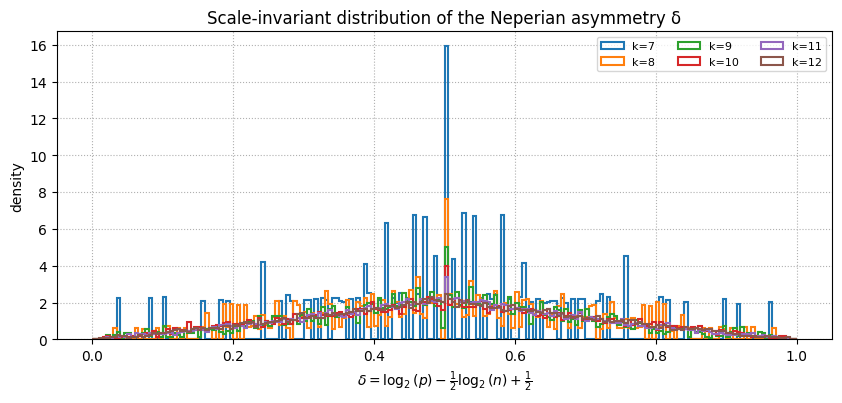

In [6]:
plt.figure(figsize=(10,4))

for k in k_list:
    plt.hist(rows[k], bins=200, range=(0,1),
             density=True, histtype="step",
             linewidth=1.5, label=f"k={k}")

plt.xlabel(r"$\delta = \log_2(p) - \frac{1}{2}\log_2(n) + \frac{1}{2}$")
plt.ylabel("density")
plt.title("Scale-invariant distribution of the Neperian asymmetry δ")
plt.grid(True, linestyle=":")
plt.legend(ncol=3, fontsize=8)
plt.show()

## Conclusion

The dyadic–Neperian change of coordinates reveals a **universal probabilistic geometry** of semiprime factorization.

*Le changement de coordonnées dyadique–népérien met en évidence une **géométrie probabiliste universelle** de la factorisation des semi-premiers.*

The Neperian asymmetry variable $(\delta)$:
* is bounded in $([0,1])$,
* centered at $(0.5)$,
* exhibits a stable dispersion,
* and is **invariant under dyadic scale changes**.

*La variable de dissymétrie népérienne $(\delta)$:*
* *est bornée dans $([0,1])$,*
* *est unimodale et centrée en $(0.5)$,*
* *présente une dispersion stable,*
* *et est **invariante par changement d’échelle dyadique**.*

This result is non-trivial and could not be observed in linear coordinates.
It provides a rigorous foundation for **improved trawling strategies**, showing that prime factors of a semiprime are statistically constrained around $(\sqrt{n})$, independently of scale.
The approach presented here constitutes a **canonical endpoint** of the dyadic exploration phase, and a reliable starting point for further algorithmic or theoretical developments.

*Ce résultat est non trivial et ne pouvait pas être observé en coordonnées linéaires.*
*Il montre que la localisation des facteurs premiers d’un semi-premier n’est pas libre, mais statistiquement contrainte autour de $(\sqrt{n})$, indépendamment de l’échelle considérée.*
*Cette étude constitue ainsi un **aboutissement canonique** de la phase d’exploration dyadique. Elle fournit un fondement théorique solide à des **stratégies de chalutage améliorées**, reposant sur une réduction significative de l’espace effectif de recherche des facteurs.*


